In [4]:
import torch
import lightning as L
from torch.utils.data import TensorDataset,DataLoader
# custom modules
from word_embedding import WordEmbeddings
from utils import plot_token_relations , vectorize_text, get_weights

In [5]:
input_texts = ["Roads ? Where we're going we don't need roads.","It's alive! It's alive!","May the Force be with you.","Life finds a way."]

In [6]:
eos_symbol = '<eos>'
input_texts = [input_text.lower() + f' {eos_symbol}' for input_text in input_texts]

In [7]:
vocabulary = []
for text in input_texts:
    vocabulary.extend(text.split(' '))
vocabulary = list(set(vocabulary))

In [8]:
vocabulary

["don't",
 '<eos>',
 'force',
 'the',
 'we',
 'may',
 'a',
 'roads',
 'be',
 'going',
 'need',
 'roads.',
 'alive!',
 'where',
 "we're",
 'with',
 'life',
 'you.',
 'way.',
 '?',
 "it's",
 'finds']

In [9]:
input_encodings = []
label_encodings = []
for text in input_texts:
    inputs,labels = vectorize_text(eos_symbol,text,vocabulary)
    input_encodings.extend(inputs)
    label_encodings.extend(labels)

In [10]:
len(input_encodings[0])


22

In [11]:
len(label_encodings[0])

22

In [12]:
inputs = torch.tensor(input_encodings)
labels = torch.tensor(label_encodings)
dataset = TensorDataset(inputs,labels)
dataloader = DataLoader(dataset)

In [13]:
len(vocabulary)

22

In [14]:
word_embedding = WordEmbeddings(vocab_size=len(vocabulary),network_width=3)

Pre training parameters


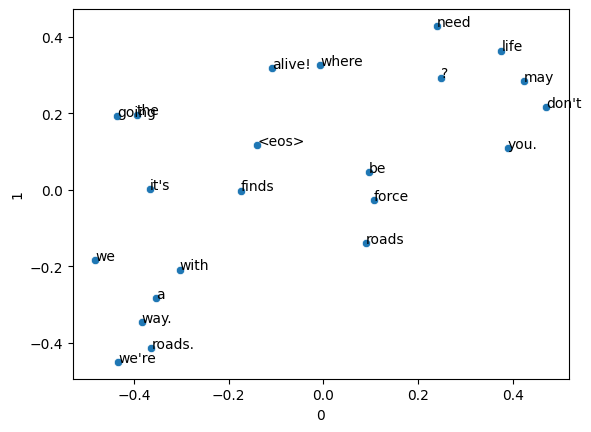

In [15]:
print('Pre training parameters')
plot_token_relations(word_embedding,vocabulary)

In [16]:
trainer = L.Trainer(max_epochs=150)
trainer.fit(word_embedding,train_dataloaders=dataloader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type             | Params
--------------------------------------------------
0 | loss         | CrossEntropyLoss | 0     
  | other params | n/a              | 132   
--------------------------------------------------
132       Trainable params
0         Non-trainable params
132       Total params
0.001     Total estimated model params size (MB)
C:\Users\parag\.conda\envs\encoder_decoder\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
C:\Users\parag\.conda\envs\encoder_decoder\lib\site-packages\lightning\pytorch\loops\fit_loop.py:293: The number of

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=150` reached.


Post training parameters


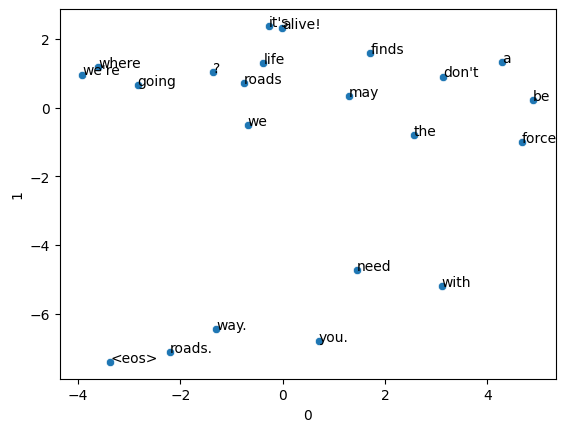

In [20]:
print('Post training parameters')
plot_token_relations(word_embedding,vocabulary)

In [21]:
weights_df = get_weights(word_embedding,vocabulary)

In [22]:
weights_df

,0,1,2,token
0,3.134836,0.908104,4.900590,don't
1,-3.366259,-7.410185,-1.900576,<eos>
2,4.679783,-1.009635,-0.260740,force
3,2.568242,-0.799874,-3.060264,the
4,-0.683863,-0.512653,5.331188,we
5,1.289027,0.340447,-2.124624,may
6,4.281835,1.321408,-0.550027,a
7,-0.762477,0.714628,-1.852384,roads
8,4.898881,0.226817,2.237710,be
9,-2.834515,0.669905,3.942034,going
